In [1]:
# 在Python解释器中顺利执行如下命令
import paddle

paddle.utils.run_check()

# 如果命令行出现以下提示，说明PaddlePaddle安装成功
# PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.
print(paddle.__version__)


Running verify PaddlePaddle program ... 
PaddlePaddle works well on 1 GPU.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.
2.5.2


In [ ]:
!python src/seg_demo.py --config inference_models/portrait_pp_humansegv2_lite_256x144_inference_model_with_softmax/deploy.yaml


In [3]:
import os
from skimage import io
import numpy as np

mask_np = io.imread("../Rural/masks_png/3.png")
img_np = io.imread("../Rural/images_png/3.png")

img_np

array([[[ 59,  80,  50],
        [ 53,  73,  36],
        [ 59,  78,  43],
        ...,
        [ 62,  67,  69],
        [ 57,  65,  60],
        [ 61,  69,  53]],

       [[ 67,  94,  63],
        [ 62,  84,  42],
        [ 57,  77,  43],
        ...,
        [ 57,  69,  60],
        [ 61,  77,  59],
        [ 63,  77,  59]],

       [[ 72, 101,  79],
        [ 68,  98,  70],
        [ 58,  84,  51],
        ...,
        [ 63,  76,  51],
        [ 60,  74,  50],
        [ 73,  97,  78]],

       ...,

       [[107, 113, 107],
        [ 98, 103,  96],
        [ 93,  98,  89],
        ...,
        [ 66,  65,  56],
        [ 58,  60,  52],
        [ 47,  51,  44]],

       [[112, 118, 109],
        [101, 106,  95],
        [ 92,  98,  81],
        ...,
        [ 56,  54,  48],
        [ 46,  47,  43],
        [ 40,  44,  45]],

       [[114, 121, 113],
        [110, 116, 109],
        [ 94,  99,  85],
        ...,
        [ 48,  47,  44],
        [ 38,  39,  40],
        [ 36,  41,  49]]

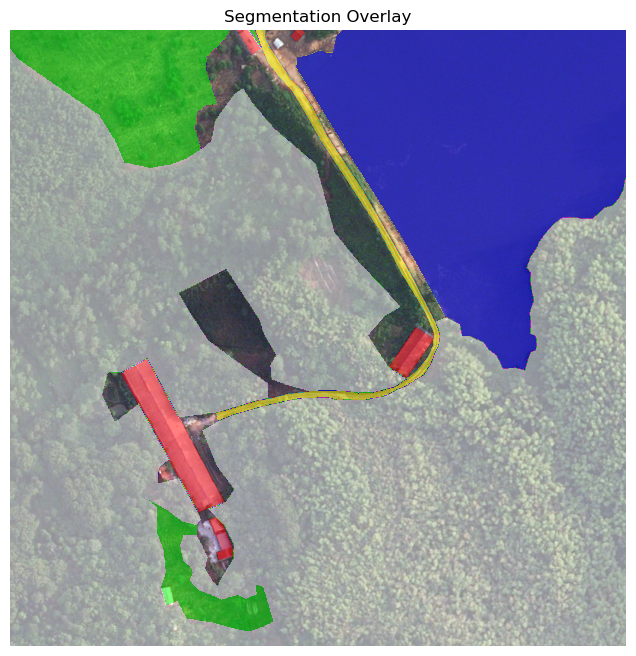

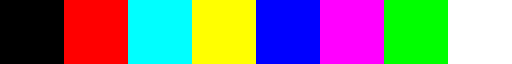

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from matplotlib.colors import ListedColormap

# 读取图像和mask
idx = 408
img_np = io.imread(f"../Rural/images_png/{idx}.png")  # shape: (H, W, 3)
mask_np = io.imread(f"../Rural/masks_png/{idx}.png")  # shape: (H, W)，值为 0–6

# 自定义一个7类的colormap
colors = [
    (0, 0, 0),  # 0: 背景
    (1, 0, 0),  # 1: 红色
    (0, 1, 1),  # 2: 青绿色 
    (1, 1, 0),  # 3: yellow
    (0, 0, 1),  # 4: blue water
    (1, 0, 1),  # 5: 洋红
    (0, 1, 0),  # 6: green forest
    (1, 1, 1),  # 7: （如果mask中可能出现）
]
cmap = ListedColormap(colors)

# 创建一个透明度通道 alpha，非0区域透明度为0.5
alpha = np.where(mask_np > 0, 0.5, 0)

# 可视化叠加效果
plt.figure(figsize=(8, 8))
plt.imshow(img_np)
plt.imshow(mask_np, cmap=cmap, alpha=alpha)
plt.axis("off")
plt.title("Segmentation Overlay")
plt.show()
cmap

In [ ]:
!python tools/train.py --config configs/pp_liteseg/pp_liteseg_rural.yml --save_dir output/rural_seg_pplite --save_interval 1000 --do_eval --resume_model output\rural_seg_pplite\best_model

In [ ]:
!python tools/train.py --config configs/pp_liteseg/pp_liteseg_rural.yml --save_dir output/rural_seg_pplite --save_interval 1000 --do_eval --resume_model output\rural_seg_pplite\iter_9000


In [ ]:
# PPLITESEG rural 2
!python tools/train.py --config configs/pp_liteseg/pp_liteseg_rural_2.yml --save_dir output/rural_seg_pplite_2 --save_interval 500 --do_eval 


In [ ]:
# pplite rural 3
!python tools/train.py --config configs/pp_liteseg/pp_liteseg_rural_3.yml --save_dir ../output/rural_seg_pplite_3 --save_interval 500 --do_eval 

In [ ]:
!python tools/train.py --config configs/pp_liteseg/pp_liteseg_rural.yml --save_dir ../output/rural_seg_pplite_4 --save_interval 500 --do_eval 

In [27]:
# PPLITESEG whdld
# !python tools/train.py --config configs/pp_liteseg/pp_liteseg_whdld.yml --save_dir output/rural_seg_whdld --save_interval 500 --do_eval 

!python tools/predict.py --config configs/pp_liteseg/pp_liteseg_whdld.yml --model_path output/rural_seg_whdld/iter_3500-2/model.pdparams  --image_path ../photo/1.jpg --save_dir ./output/rural_seg_whdld --crop_size 512 512 --stride 256 256

[2025/04/05 11:12:32] INFO: 
------------Environment Information-------------
platform: Windows-10-10.0.19045-SP0
Python: 3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
Paddle compiled with cuda: True
NVCC: Build cuda_12.1.r12.1/compiler.32415258_0
cudnn: 8.9
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: NVIDIA GeForce']
PaddleSeg: 0.0.0.dev0
PaddlePaddle: 2.5.2
OpenCV: 4.5.5
------------------------------------------------
[2025/04/05 11:12:32] INFO: 
---------------Config Information---------------
batch_size: 8
iters: 80000
train_dataset:
  dataset_root: ../WHDLD
  mode: train
  num_classes: 6
  train_path: ../WHDLD/train.txt
  transforms:
  - max_scale_factor: 1.5
    min_scale_factor: 0.125
    scale_step_size: 0.125
    type: ResizeStepScaling
  - crop_size:
    - 256
    - 256
    type: RandomPaddingCrop
  - type: RandomHorizontalFlip
  - type: RandomBlur
  - brightness_range: 0.5
    contrast_range: 0.5
    saturation_range: 0.5
    type: RandomDistort

W0405 11:12:32.474046 28752 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 8.9, Driver API Version: 12.6, Runtime API Version: 12.0
W0405 11:12:32.475046 28752 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.

1/1 [==============================] - 0s 386ms/step


In [36]:
!python tools/predict.py --config configs/pp_liteseg/pp_liteseg_whdld.yml --model_path output/rural_seg_whdld/iter_3500-2/model.pdparams  --image_path ../photo/7.png --save_dir ./output/rural_seg_whdld --crop_size 512 512 --stride 256 256

[2025/04/05 11:16:56] INFO: 
------------Environment Information-------------
platform: Windows-10-10.0.19045-SP0
Python: 3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
Paddle compiled with cuda: True
NVCC: Build cuda_12.1.r12.1/compiler.32415258_0
cudnn: 8.9
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: NVIDIA GeForce']
PaddleSeg: 0.0.0.dev0
PaddlePaddle: 2.5.2
OpenCV: 4.5.5
------------------------------------------------
[2025/04/05 11:16:56] INFO: 
---------------Config Information---------------
batch_size: 8
iters: 80000
train_dataset:
  dataset_root: ../WHDLD
  mode: train
  num_classes: 6
  train_path: ../WHDLD/train.txt
  transforms:
  - max_scale_factor: 1.5
    min_scale_factor: 0.125
    scale_step_size: 0.125
    type: ResizeStepScaling
  - crop_size:
    - 256
    - 256
    type: RandomPaddingCrop
  - type: RandomHorizontalFlip
  - type: RandomBlur
  - brightness_range: 0.5
    contrast_range: 0.5
    saturation_range: 0.5
    type: RandomDistort

W0405 11:16:56.544693  3548 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 8.9, Driver API Version: 12.6, Runtime API Version: 12.0
W0405 11:16:56.544693  3548 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.

1/1 [==============================] - 0s 496ms/step


In [41]:
# !python tools/predict.py --config configs/pp_liteseg/pp_liteseg_whdld.yml --model_path output/rural_seg_whdld/iter_3500-2/model.pdparams  --image_path ../photo/4.jpg --save_dir ./output/rural_seg_whdld --crop_size 512 512 --stride 256 256

!python tools/predict.py --config configs/pp_liteseg/pp_liteseg_whdld.yml --model_path output/rural_seg_whdld/iter_3500-2/model.pdparams  --image_path ../photo/10.png --save_dir ./output/rural_seg_whdld --crop_size 512 512 --stride 256 256

[2025/04/05 11:18:46] INFO: 
------------Environment Information-------------
platform: Windows-10-10.0.19045-SP0
Python: 3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
Paddle compiled with cuda: True
NVCC: Build cuda_12.1.r12.1/compiler.32415258_0
cudnn: 8.9
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: NVIDIA GeForce']
PaddleSeg: 0.0.0.dev0
PaddlePaddle: 2.5.2
OpenCV: 4.5.5
------------------------------------------------
[2025/04/05 11:18:46] INFO: 
---------------Config Information---------------
batch_size: 8
iters: 80000
train_dataset:
  dataset_root: ../WHDLD
  mode: train
  num_classes: 6
  train_path: ../WHDLD/train.txt
  transforms:
  - max_scale_factor: 1.5
    min_scale_factor: 0.125
    scale_step_size: 0.125
    type: ResizeStepScaling
  - crop_size:
    - 256
    - 256
    type: RandomPaddingCrop
  - type: RandomHorizontalFlip
  - type: RandomBlur
  - brightness_range: 0.5
    contrast_range: 0.5
    saturation_range: 0.5
    type: RandomDistort

W0405 11:18:46.671581 22592 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 8.9, Driver API Version: 12.6, Runtime API Version: 12.0
W0405 11:18:46.671581 22592 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.

1/1 [==============================] - 0s 332ms/step


In [ ]:
# ppliteseg whdld 2 train
!python tools/train.py --config configs/pp_liteseg/pp_liteseg_whdld_2.yml --save_dir output/pplite_seg_whdld_2 --save_interval 500 --do_eval



In [94]:
# ppliteseg whdld 2 predict
!python tools/predict.py --config configs/pp_liteseg/pp_liteseg_whdld_2.yml --model_path output/pplite_seg_whdld_2/iter_2000_2/model.pdparams  --image_path ../photo --save_dir ./output/pplite_seg_whdld_2 --crop_size 512 512 --stride 256 256

[2025/04/05 11:58:19] INFO: 
------------Environment Information-------------
platform: Windows-10-10.0.19045-SP0
Python: 3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
Paddle compiled with cuda: True
NVCC: Build cuda_12.1.r12.1/compiler.32415258_0
cudnn: 8.9
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: NVIDIA GeForce']
PaddleSeg: 0.0.0.dev0
PaddlePaddle: 2.5.2
OpenCV: 4.5.5
------------------------------------------------
[2025/04/05 11:58:19] INFO: 
---------------Config Information---------------
batch_size: 16
iters: 80000
train_dataset:
  dataset_root: ../WHDLD
  mode: train
  num_classes: 6
  train_path: ../WHDLD/train.txt
  transforms:
  - max_scale_factor: 1.5
    min_scale_factor: 0.125
    scale_step_size: 0.125
    type: ResizeStepScaling
  - crop_size:
    - 256
    - 256
    type: RandomPaddingCrop
  - type: RandomHorizontalFlip
  - type: RandomBlur
  - brightness_range: 0.5
    contrast_range: 0.5
    saturation_range: 0.5
    type: RandomDistor

W0405 11:58:20.035728  9852 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 8.9, Driver API Version: 12.6, Runtime API Version: 12.0
W0405 11:58:20.035728  9852 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.

32/32 [==============================] - 2s 69ms/step


In [ ]:
# ppliteseg whdld 3 train
!python tools/train.py --config configs/pp_liteseg/pp_liteseg_whdld_3.yml --save_dir output/pplite_seg_whdld_3 --save_interval 500 --do_eval



In [113]:
# ppliteseg whdld 3 predict
!python tools/predict.py --config configs/pp_liteseg/pp_liteseg_whdld_3.yml --model_path output/pplite_seg_whdld_3/iter_4000_2/model.pdparams  --image_path ../photo/15.png --save_dir ./output/pplite_seg_whdld_3 --crop_size 256 256 --stride 128 128

[2025/04/05 12:46:39] INFO: 
------------Environment Information-------------
platform: Windows-10-10.0.19045-SP0
Python: 3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
Paddle compiled with cuda: True
NVCC: Build cuda_12.1.r12.1/compiler.32415258_0
cudnn: 8.9
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: NVIDIA GeForce']
PaddleSeg: 0.0.0.dev0
PaddlePaddle: 2.5.2
OpenCV: 4.5.5
------------------------------------------------
[2025/04/05 12:46:39] INFO: 
---------------Config Information---------------
batch_size: 8
iters: 80000
train_dataset:
  dataset_root: ../WHDLD
  mode: train
  num_classes: 6
  train_path: ../WHDLD/train.txt
  transforms:
  - max_scale_factor: 1.5
    min_scale_factor: 0.125
    scale_step_size: 0.125
    type: ResizeStepScaling
  - crop_size:
    - 256
    - 256
    type: RandomPaddingCrop
  - type: RandomHorizontalFlip
  - type: RandomBlur
  - brightness_range: 0.5
    contrast_range: 0.5
    saturation_range: 0.5
    type: RandomDistort

W0405 12:46:39.960013 28844 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 8.9, Driver API Version: 12.6, Runtime API Version: 12.0
W0405 12:46:39.960013 28844 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.

1/1 [==============================] - 0s 368ms/step


In [1]:
!python tools/predict.py --config configs/pp_liteseg/pp_liteseg_whdld_3.yml --model_path output/pplite_seg_whdld_3/best_model_2/model.pdparams  --image_path ../photo/ --save_dir ./output/pplite_seg_whdld_3 --crop_size 256 256 --stride 128 128

[2025/04/07 09:42:56] INFO: 
------------Environment Information-------------
platform: Windows-10-10.0.19045-SP0
Python: 3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
Paddle compiled with cuda: True
NVCC: Build cuda_12.1.r12.1/compiler.32415258_0
cudnn: 8.9
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: NVIDIA GeForce']
PaddleSeg: 0.0.0.dev0
PaddlePaddle: 2.5.2
OpenCV: 4.5.5
------------------------------------------------
[2025/04/07 09:42:56] INFO: 
---------------Config Information---------------
batch_size: 8
iters: 80000
train_dataset:
  dataset_root: ../WHDLD
  mode: train
  num_classes: 6
  train_path: ../WHDLD/train.txt
  transforms:
  - max_scale_factor: 1.5
    min_scale_factor: 0.125
    scale_step_size: 0.125
    type: ResizeStepScaling
  - crop_size:
    - 256
    - 256
    type: RandomPaddingCrop
  - type: RandomHorizontalFlip
  - type: RandomBlur
  - brightness_range: 0.5
    contrast_range: 0.5
    saturation_range: 0.5
    type: RandomDistort

W0407 09:42:56.352068 17200 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 8.9, Driver API Version: 12.6, Runtime API Version: 12.0
W0407 09:42:56.353067 17200 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.

36/36 [==============================] - 3s 84ms/step


In [5]:
!python tools/predict.py --config configs/pp_liteseg/pp_liteseg_whdld_3.yml --model_path output/pplite_seg_whdld_3/best_model_2/model.pdparams  --image_path ../photo/ --save_dir ./output/pplite_seg_whdld_3 --crop_size 256 256 --stride 128 128

[2025/04/06 23:48:52] INFO: 
------------Environment Information-------------
platform: Windows-10-10.0.19045-SP0
Python: 3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
Paddle compiled with cuda: True
NVCC: Build cuda_12.1.r12.1/compiler.32415258_0
cudnn: 8.9
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: NVIDIA GeForce']
PaddleSeg: 0.0.0.dev0
PaddlePaddle: 2.5.2
OpenCV: 4.5.5
------------------------------------------------
[2025/04/06 23:48:52] INFO: 
---------------Config Information---------------
batch_size: 8
iters: 80000
train_dataset:
  dataset_root: ../WHDLD
  mode: train
  num_classes: 6
  train_path: ../WHDLD/train.txt
  transforms:
  - max_scale_factor: 1.5
    min_scale_factor: 0.125
    scale_step_size: 0.125
    type: ResizeStepScaling
  - crop_size:
    - 256
    - 256
    type: RandomPaddingCrop
  - type: RandomHorizontalFlip
  - type: RandomBlur
  - brightness_range: 0.5
    contrast_range: 0.5
    saturation_range: 0.5
    type: RandomDistort

W0406 23:48:53.277112 19532 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 8.9, Driver API Version: 12.6, Runtime API Version: 12.0
W0406 23:48:53.277112 19532 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.

36/36 [==============================] - 2s 64ms/step


In [7]:
!python tools/predict.py --config configs/pp_liteseg/pp_liteseg_whdld_3.yml --model_path output/pplite_seg_whdld_3/best_model/model.pdparams  --image_path ../photo/ --save_dir ./output/pplite_seg_whdld_3 --crop_size 256 256 --stride 128 128

[2025/04/06 23:49:25] INFO: 
------------Environment Information-------------
platform: Windows-10-10.0.19045-SP0
Python: 3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
Paddle compiled with cuda: True
NVCC: Build cuda_12.1.r12.1/compiler.32415258_0
cudnn: 8.9
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: NVIDIA GeForce']
PaddleSeg: 0.0.0.dev0
PaddlePaddle: 2.5.2
OpenCV: 4.5.5
------------------------------------------------
[2025/04/06 23:49:25] INFO: 
---------------Config Information---------------
batch_size: 8
iters: 80000
train_dataset:
  dataset_root: ../WHDLD
  mode: train
  num_classes: 6
  train_path: ../WHDLD/train.txt
  transforms:
  - max_scale_factor: 1.5
    min_scale_factor: 0.125
    scale_step_size: 0.125
    type: ResizeStepScaling
  - crop_size:
    - 256
    - 256
    type: RandomPaddingCrop
  - type: RandomHorizontalFlip
  - type: RandomBlur
  - brightness_range: 0.5
    contrast_range: 0.5
    saturation_range: 0.5
    type: RandomDistort

W0406 23:49:25.539825   900 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 8.9, Driver API Version: 12.6, Runtime API Version: 12.0
W0406 23:49:25.539825   900 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.

36/36 [==============================] - 2s 66ms/step


In [ ]:
# rtformer udd train
!python tools/train.py --config configs/rtformer/rtformer_base_cityscapes_1024x512_120k.yml --save_dir ../output/rtformer_udd --save_interval 500 --do_eval --use_vdl 

In [4]:
# rtformer udd predict
!python tools/predict.py --config configs/rtformer/rtformer_base_cityscapes_1024x512_120k.yml  --model_path ../output/rtformer_udd/best_model_2/model.pdparams --image_path "../photo/DJI_00527.JPG"  --save_dir ../output/rtformer_udd

[2025/04/17 13:32:54] INFO: 
------------Environment Information-------------
platform: Windows-10-10.0.19045-SP0
Python: 3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
Paddle compiled with cuda: True
NVCC: Build cuda_12.1.r12.1/compiler.32415258_0
cudnn: 8.9
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: NVIDIA GeForce']
PaddleSeg: 0.0.0.dev0
PaddlePaddle: 2.5.2
OpenCV: 4.5.5
------------------------------------------------
[2025/04/17 13:32:54] INFO: 
---------------Config Information---------------
batch_size: 6
iters: 120000
train_dataset:
  dataset_root: ../UDD6/
  mode: train
  num_classes: 6
  train_path: ../UDD6/train.txt
  transforms:
  - max_scale_factor: 2.0
    min_scale_factor: 0.5
    scale_step_size: 0.25
    type: ResizeStepScaling
  - crop_size:
    - 1024
    - 512
    type: RandomPaddingCrop
  - type: RandomHorizontalFlip
  - brightness_range: 0.4
    contrast_range: 0.4
    saturation_range: 0.4
    type: RandomDistort
  - mean:
    - 0.485


W0417 13:32:54.638336 31800 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 8.9, Driver API Version: 12.6, Runtime API Version: 12.0
W0417 13:32:54.638336 31800 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.

1/1 [==============================] - 1s 907ms/step


In [5]:
# rtformer udd predict
!python tools/predict.py --config configs/rtformer/rtformer_base_cityscapes_1024x512_120k.yml  --model_path ../output/rtformer_udd/best_model_2/model.pdparams --image_path "../photo"  --save_dir ../output/rtformer_udd

[2025/04/17 13:35:45] INFO: 

W0417 13:35:45.588248 12928 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 8.9, Driver API Version: 12.6, Runtime API Version: 12.0
W0417 13:35:45.589248 12928 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.

106/106 [==============================] - 24s 229ms/step



------------Environment Information-------------
platform: Windows-10-10.0.19045-SP0
Python: 3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
Paddle compiled with cuda: True
NVCC: Build cuda_12.1.r12.1/compiler.32415258_0
cudnn: 8.9
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: NVIDIA GeForce']
PaddleSeg: 0.0.0.dev0
PaddlePaddle: 2.5.2
OpenCV: 4.5.5
------------------------------------------------
[2025/04/17 13:35:45] INFO: 
---------------Config Information---------------
batch_size: 6
iters: 120000
train_dataset:
  dataset_root: ../UDD6/
  mode: train
  num_classes: 6
  train_path: ../UDD6/train.txt
  transforms:
  - max_scale_factor: 2.0
    min_scale_factor: 0.5
    scale_step_size: 0.25
    type: ResizeStepScaling
  - crop_size:
    - 1024
    - 512
    type: RandomPaddingCrop
  - type: RandomHorizontalFlip
  - brightness_range: 0.4
    contrast_range: 0.4
    saturation_range: 0.4
    type: RandomDistort
  - mean:
    - 0.485
    - 0.456
    - 0.406
    

In [ ]:
# rtformer udd train
!python tools/train.py --config configs/rtformer/rtformer_base_cityscapes_1024x512_120k_2.yml --save_dir ../output/rtformer_udd_2 --save_interval 500 --do_eval --use_vdl



In [ ]:
# std2 ppliteseg train
!python tools/train.py --config configs/pp_liteseg/pp_liteseg_rural_std2.yml --save_dir output/rural_seg_pplite_std2 --save_interval 500 --do_eval --use_vdl --resume_model output\rural_seg_pplite_std2\iter_1000

In [39]:
# STD2 predict
# !python tools/predict.py --config configs/pp_liteseg/pp_liteseg_rural_std2.yml --model_path output/rural_seg_pplite_std2/best_model/model.pdparams --image_path ../rural/images_png/194.png --save_dir ./output/rural_seg_pplite_std2

!python tools/predict.py --config configs/pp_liteseg/pp_liteseg_rural_std2.yml --model_path output/rural_seg_pplite_std2-2/best_model/model.pdparams --image_path "../photo/14.png"  --save_dir ./output/rural_seg_pplite_std2-2

[2025/04/05 08:55:11] INFO: 
------------Environment Information-------------
platform: Windows-10-10.0.19045-SP0
Python: 3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
Paddle compiled with cuda: True
NVCC: Build cuda_12.1.r12.1/compiler.32415258_0
cudnn: 8.9
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: NVIDIA GeForce']
PaddleSeg: 0.0.0.dev0
PaddlePaddle: 2.5.2
OpenCV: 4.5.5
------------------------------------------------
[2025/04/05 08:55:11] INFO: 
---------------Config Information---------------
batch_size: 4
iters: 160000
train_dataset:
  dataset_root: ../rural
  mode: train
  num_classes: 7
  train_path: ../rural/train.txt
  transforms:
  - max_scale_factor: 1.75
    min_scale_factor: 0.25
    scale_step_size: 0.125
    type: ResizeStepScaling
  - crop_size:
    - 512
    - 512
    type: RandomPaddingCrop
  - type: RandomHorizontalFlip
  - type: RandomBlur
  - brightness_range: 0.6
    contrast_range: 0.6
    saturation_range: 0.6
    type: RandomDistor

W0405 08:55:11.732095  4164 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 8.9, Driver API Version: 12.6, Runtime API Version: 12.0
W0405 08:55:11.732095  4164 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.

1/1 [==============================] - 0s 417ms/step


In [ ]:
# pplite  udd
!python tools/train.py --config configs/segformer/segformer_udd_b3.yml --save_dir ../output/segformer_udd_b3  --save_interval 500 --do_eval --use_vdl

In [ ]:
# segformer b3 udd
!python tools/train.py --config configs/segformer/segformer_udd_b3.yml --save_dir ../output/segformer_udd_b3  --save_interval 500 --do_eval --use_vdl

In [ ]:
# segformer b3 udd train 2
!python tools/train.py --config configs/segformer/segformer_udd_b3_2.yml --save_dir ../output/segformer_udd_b3_2  --save_interval 500 --do_eval --use_vdl

In [ ]:
# SEGFORMER B3 train
!python tools/train.py --config configs/segformer/segformer_rural_b3.yml --save_dir output/segformer_rural_b3  --save_interval 500 --do_eval --use_vdl
# SEGFORMER
!python tools/predict.py --config configs/segformer/segformer_rural_b2.yml --model_path output/segformer_rural_b2 /best_model/model.pdparams --image_path ../photo/7.png --save_dir ./output/segformer_rural_b2 

In [ ]:
!python tools/train.py --config configs/segformer/segformer_rural_b3.yml --save_dir output/segformer_rural_b3_2  --save_interval 500 --do_eval --use_vdl

In [ ]:
# SEGFORMER B3 train
!python tools/train.py --config configs/segformer/segformer_rural_b3_2.yml --save_dir output/segformer_rural_b3_2  --save_interval 500 --do_eval --use_vdl

In [ ]:
# SEGFORMER B2 train
!python tools/train.py --config configs/segformer/segformer_rural_b2.yml --save_dir output/segformer_rural_b2  --save_interval 500 --do_eval --use_vdl

!python tools/predict.py --config configs/segformer/segformer_rural_b2.yml --model_path output/segformer_rural_b2 /best_model/model.pdparams --image_path ../photo/7.png --save_dir ./output/segformer_rural_b2 

In [ ]:
# SEGFORMER B1 train
!python tools/train.py --config configs/segformer/segformer_rural_b1.yml --save_dir output/segformer_rural_b1  --save_interval 500 --do_eval --resume_model output\segformer_rural_b1\iter_2000

!python tools/predict.py --config configs/segformer/segformer_rural_b1.yml --model_path output/segformer_rural_b1 /best_model/model.pdparams --image_path ../photo/7.png --save_dir ./output/segformer_rural_b1

In [28]:
!python tools/predict.py --config configs/segformer/segformer_rural_b1.yml --model_path output/segformer_rural_b1/best_model/model.pdparams --image_path ../photo/7.png --save_dir ./output/segformer_rural_b1

^C


In [6]:
# !python tools/predict.py --config configs/pp_liteseg/pp_liteseg_rural.yml --model_path output/rural_seg_pplite/best_model/model.pdparams --image_path ../rural/images_png/651.png --save_dir ./output/rural_seg_pplite

# ppliteseg 
!python tools/predict.py --config configs/pp_liteseg/pp_liteseg_rural.yml --model_path output/rural_seg_pplite/best_model/model.pdparams --image_path ../photo/4.jpg --save_dir ./output/rural_seg_pplite --crop_size 1024 1024 --stride 256 256

[2025/04/05 10:50:10] INFO: 
------------Environment Information-------------
platform: Windows-10-10.0.19045-SP0
Python: 3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
Paddle compiled with cuda: True
NVCC: Build cuda_12.1.r12.1/compiler.32415258_0
cudnn: 8.9
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: NVIDIA GeForce']
PaddleSeg: 0.0.0.dev0
PaddlePaddle: 2.5.2
OpenCV: 4.5.5
------------------------------------------------
[2025/04/05 10:50:10] INFO: 
---------------Config Information---------------
batch_size: 4
iters: 160000
train_dataset:
  dataset_root: ../rural
  mode: train
  num_classes: 7
  train_path: ../rural/train.txt
  transforms:
  - max_scale_factor: 1.5
    min_scale_factor: 0.125
    scale_step_size: 0.125
    type: ResizeStepScaling
  - crop_size:
    - 1024
    - 512
    type: RandomPaddingCrop
  - type: RandomHorizontalFlip
  - brightness_range: 0.5
    contrast_range: 0.5
    saturation_range: 0.5
    type: RandomDistort
  - type: Normaliz

W0405 10:50:10.796926 17456 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 8.9, Driver API Version: 12.6, Runtime API Version: 12.0
W0405 10:50:10.796926 17456 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.

1/1 [==============================] - 0s 289ms/step


In [18]:
# ppliteseg2
!python tools/predict.py --config configs/pp_liteseg/pp_liteseg_rural_2.yml --model_path output/rural_seg_pplite_2/best_model/model.pdparams --image_path "D:\pythonProject\DeepSeek\ps3\PaddleSeg3\Rural\images_png\651.png" --save_dir ./output/rural_seg_pplite_2

[2025/04/05 00:42:36] INFO: 
------------Environment Information-------------
platform: Windows-10-10.0.19045-SP0
Python: 3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
Paddle compiled with cuda: True
NVCC: Build cuda_12.1.r12.1/compiler.32415258_0
cudnn: 8.9
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: NVIDIA GeForce']
PaddleSeg: 0.0.0.dev0
PaddlePaddle: 2.5.2
OpenCV: 4.5.5
------------------------------------------------
[2025/04/05 00:42:36] INFO: 
---------------Config Information---------------
batch_size: 8
iters: 160000
train_dataset:
  dataset_root: ../rural
  mode: train
  num_classes: 7
  train_path: ../rural/train.txt
  transforms:
  - max_scale_factor: 1.5
    min_scale_factor: 0.125
    scale_step_size: 0.125
    type: ResizeStepScaling
  - crop_size:
    - 768
    - 768
    type: RandomPaddingCrop
  - type: RandomHorizontalFlip
  - type: RandomBlur
  - brightness_range: 0.5
    contrast_range: 0.5
    saturation_range: 0.5
    type: RandomDistor

W0405 00:42:36.497162 12484 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 8.9, Driver API Version: 12.6, Runtime API Version: 12.0
W0405 00:42:36.497162 12484 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.

1/1 [==============================] - 1s 607ms/step


In [23]:
# best seg
!python tools/predict.py --config configs/pp_liteseg/pp_liteseg_whdld.yml --model_path output/rural_seg_whdld/iter_3500-2/model.pdparams  --image_path ../photo/ --save_dir ../output/rural_seg_whdld --crop_size 512 512 --stride 256 256


[2025/04/08 16:58:53] INFO: 
------------Environment Information-------------
platform: Windows-10-10.0.19045-SP0
Python: 3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
Paddle compiled with cuda: True
NVCC: Build cuda_12.1.r12.1/compiler.32415258_0
cudnn: 8.9
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: NVIDIA GeForce']
PaddleSeg: 0.0.0.dev0
PaddlePaddle: 2.5.2
OpenCV: 4.5.5
------------------------------------------------
[2025/04/08 16:58:53] INFO: 
---------------Config Information---------------
batch_size: 8
iters: 80000
train_dataset:
  dataset_root: ../WHDLD
  mode: train
  num_classes: 6
  train_path: ../WHDLD/train.txt
  transforms:
  - max_scale_factor: 1.5
    min_scale_factor: 0.125
    scale_step_size: 0.125
    type: ResizeStepScaling
  - crop_size:
    - 256
    - 256
    type: RandomPaddingCrop
  - type: RandomHorizontalFlip
  - type: RandomBlur
  - brightness_range: 0.5
    contrast_range: 0.5
    saturation_range: 0.5
    type: RandomDistort

W0408 16:58:54.278127 26352 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 8.9, Driver API Version: 12.6, Runtime API Version: 12.0
W0408 16:58:54.278127 26352 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.

54/54 [==============================] - 5s 95ms/step


In [12]:
!python tools/predict.py --config configs/pp_liteseg/pp_liteseg_rural.yml --model_path output/rural_seg_pplite/best_model/model.pdparams --image_path ../photo/4.jpg --save_dir ./output/rural_seg_pplite

[2025/04/04 19:42:59] INFO: 
------------Environment Information-------------
platform: Windows-10-10.0.19045-SP0
Python: 3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
Paddle compiled with cuda: True
NVCC: Build cuda_12.1.r12.1/compiler.32415258_0
cudnn: 8.9
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: NVIDIA GeForce']
PaddleSeg: 0.0.0.dev0
PaddlePaddle: 2.5.2
OpenCV: 4.5.5
------------------------------------------------
[2025/04/04 19:42:59] INFO: 
---------------Config Information---------------
batch_size: 4
iters: 160000
train_dataset:
  dataset_root: ../rural
  mode: train
  num_classes: 7
  train_path: ../rural/train.txt
  transforms:
  - max_scale_factor: 1.5
    min_scale_factor: 0.125
    scale_step_size: 0.125
    type: ResizeStepScaling
  - crop_size:
    - 1024
    - 512
    type: RandomPaddingCrop
  - type: RandomHorizontalFlip
  - brightness_range: 0.5
    contrast_range: 0.5
    saturation_range: 0.5
    type: RandomDistort
  - type: Normaliz

W0404 19:42:59.529661  4448 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 8.9, Driver API Version: 12.6, Runtime API Version: 12.0
W0404 19:42:59.529661  4448 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.

1/1 [==============================] - 0s 344ms/step


In [ ]:
!python tools/train.py --config configs/segformer/segformer_rural.yml --savedir output/segformer_rural --save_interval 300 --do_eval

In [ ]:
# ROAD SEG
!python tools/predict.py --config configs/road_seg/pp_liteseg_stdc1_deepglobe_1024x1024_80k.yml --model_path pretrained/pp_liteseg_stdc1_deepglobe.pdparams --image_path ../photo/4.jpg --save_dir output/road_seg


In [ ]:
# segmenter whdld train
!python tools/train.py --config configs/segmenter/segmenter_whdld.yml --save_dir output/segmenter_whdld--save_interval 500 --do_eval --use_vdl

In [ ]:
# segmenter rural train
!python tools/train.py --config configs/segmenter/segmenter_rural.yml --save_dir output/segmenter_rural --save_interval 500 --do_eval --use_vdl --resume_model

In [10]:
# segmenter rural predict
!python tools/predict.py --config configs/segmenter/segmenter_rural.yml --model_path output/segmenter_rural/best_model/model.pdparams  --image_path ../photo/ --save_dir ./output/segmenter_rural 

[2025/04/08 10:49:13] INFO: 
------------Environment Information-------------
platform: Windows-10-10.0.19045-SP0
Python: 3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
Paddle compiled with cuda: True
NVCC: Build cuda_12.1.r12.1/compiler.32415258_0
cudnn: 8.9
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: NVIDIA GeForce']
PaddleSeg: 0.0.0.dev0
PaddlePaddle: 2.5.2
OpenCV: 4.5.5
------------------------------------------------
[2025/04/08 10:49:13] INFO: 
---------------Config Information---------------
batch_size: 4
iters: 80000
train_dataset:
  dataset_root: ../rural
  mode: train
  num_classes: 7
  train_path: ../rural/train.txt
  transforms:
  - short_size: 512
    type: ResizeByShort
  - type: RandomHorizontalFlip
  - type: RandomDistort
  - type: Normalize
  - target_size:
    - 512
    - 512
    type: Padding
  type: Dataset
val_dataset:
  dataset_root: ../rural
  mode: val
  num_classes: 7
  transforms:
  - short_size: 512
    type: ResizeByShort
  - type

W0408 10:49:14.237481   572 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 8.9, Driver API Version: 12.6, Runtime API Version: 12.0
W0408 10:49:14.237481   572 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.

48/48 [==============================] - 6s 128ms/step


In [ ]:
# segmenter rural2 train
!python tools/train.py --config configs/segmenter/segmenter_rural2.yml --save_dir ../output/segmenter_rural2 --save_interval 500 --do_eval --use_vdl 

In [21]:
# segmenter rural2 predict
!python tools/predict.py --config configs/segmenter/segmenter_rural2.yml --model_path ../output/segmenter_rural2/best_model/model.pdparams  --image_path ../photo/ --save_dir ../output/segmenter_rural2 --crop_size 512 512  --stride 512 512

[2025/04/08 16:56:51] INFO: 

W0408 16:56:51.537456 14232 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 8.9, Driver API Version: 12.6, Runtime API Version: 12.0
W0408 16:56:51.537456 14232 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.

54/54 [==============================] - 9s 165ms/step



------------Environment Information-------------
platform: Windows-10-10.0.19045-SP0
Python: 3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
Paddle compiled with cuda: True
NVCC: Build cuda_12.1.r12.1/compiler.32415258_0
cudnn: 8.9
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: NVIDIA GeForce']
PaddleSeg: 0.0.0.dev0
PaddlePaddle: 2.5.2
OpenCV: 4.5.5
------------------------------------------------
[2025/04/08 16:56:51] INFO: 
---------------Config Information---------------
batch_size: 4
iters: 120000
train_dataset:
  dataset_root: ../rural
  mode: train
  num_classes: 7
  train_path: ../rural/train.txt
  transforms:
  - short_size: 512
    type: ResizeByShort
  - type: RandomHorizontalFlip
  - type: RandomDistort
  - type: Normalize
  - target_size:
    - 512
    - 512
    type: Padding
  type: Dataset
val_dataset:
  dataset_root: ../rural
  mode: val
  num_classes: 7
  transforms:
  - short_size: 512
    type: ResizeByShort
  - type: Normalize
  type: Dataset

In [ ]:
# segmenter gid train
!python tools/train.py --config configs/segmenter/segmenter_gid.yml --save_dir output/segmenter_gid --save_interval 500 --do_eval --use_vdl

In [13]:
!python tools/predict.py --config configs/segmenter/segmenter_gid.yml --model_path output/segmenter_gid/best_model/model.pdparams  --image_path ../photo/ --save_dir ./output/segmenter_gid

[2025/04/08 13:42:48] INFO: 
------------Environment Information-------------
platform: Windows-10-10.0.19045-SP0
Python: 3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
Paddle compiled with cuda: True
NVCC: Build cuda_12.1.r12.1/compiler.32415258_0
cudnn: 8.9
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: NVIDIA GeForce']
PaddleSeg: 0.0.0.dev0
PaddlePaddle: 2.5.2
OpenCV: 4.5.5
------------------------------------------------
[2025/04/08 13:42:48] INFO: 
---------------Config Information---------------
batch_size: 4
iters: 80000
train_dataset:
  dataset_root: ../gid
  mode: train
  num_classes: 16
  train_path: ../gid/train.txt
  transforms:
  - short_size: 512
    type: ResizeByShort
  - type: RandomHorizontalFlip
  - type: RandomDistort
  - type: Normalize
  - target_size:
    - 512
    - 512
    type: Padding
  type: Dataset
val_dataset:
  dataset_root: ../gid
  mode: val
  num_classes: 16
  transforms:
  - short_size: 512
    type: ResizeByShort
  - type: No

W0408 13:42:49.058873 12172 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 8.9, Driver API Version: 12.6, Runtime API Version: 12.0
W0408 13:42:49.059378 12172 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.

48/48 [==============================] - 9s 192ms/step


In [ ]:
# segmenter gid2 train
!python tools/train.py --config configs/segmenter/segmenter_gid.yml --save_dir output/segmenter_gid2 --save_interval 500 --do_eval --use_vdl

In [16]:
# segmenter gid2 predict
!python tools/predict.py --config configs/segmenter/segmenter_gid.yml --model_path output/segmenter_gid2/best_model/model.pdparams  --image_path ../photo/ --save_dir ../output/segmenter_gid2 --crop_size 256 256 --stride 128 128

[2025/04/08 14:25:10] INFO: 
------------Environment Information-------------
platform: Windows-10-10.0.19045-SP0
Python: 3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
Paddle compiled with cuda: True
NVCC: Build cuda_12.1.r12.1/compiler.32415258_0
cudnn: 8.9
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: NVIDIA GeForce']
PaddleSeg: 0.0.0.dev0
PaddlePaddle: 2.5.2
OpenCV: 4.5.5
------------------------------------------------
[2025/04/08 14:25:10] INFO: 
---------------Config Information---------------
batch_size: 4
iters: 160000
train_dataset:
  dataset_root: ../gid
  mode: train
  num_classes: 16
  train_path: ../gid/train.txt
  transforms:
  - short_size: 512
    type: ResizeByShort
  - type: RandomHorizontalFlip
  - type: RandomDistort
  - type: Normalize
  - target_size:
    - 512
    - 512
    type: Padding
  type: Dataset
val_dataset:
  dataset_root: ../gid
  mode: val
  num_classes: 16
  transforms:
  - short_size: 512
    type: ResizeByShort
  - type: N

W0408 14:25:10.615846 32220 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 8.9, Driver API Version: 12.6, Runtime API Version: 12.0
W0408 14:25:10.615846 32220 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.

54/54 [==============================] - 10s 180ms/step
